In [24]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [25]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_loan = pd.read_csv("Resources/lending_data.csv")
df_loan.head()

# Review the DataFrame
df_loan.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [26]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_loan["loan_status"].values.reshape(-1, 1)


# Separate the X variable, the features
X = df_loan.copy()
X.drop("loan_status", axis=1, inplace=True)



In [27]:
# Review the y variable Series
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [28]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [29]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [30]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
y_train = y_train.ravel()
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [31]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

# Ensure predictions and y_test are 1-dimensional
predictions = predictions.ravel()
y_test=y_test.ravel()

# Create the DataFrame
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [32]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [33]:
# Print the classification report for the model
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18655,110
Actual 1,36,583


Accuracy Score : 0.9924680148576145
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

The logistic regression model predicts _healthy loans_ with *perfect precision* (1.00) and predicts _high-risk loans_ less with *less precision* (.84). 

- The classification model has an *accuracy* score of .99 which means that overall, it is performing very well.

- The *recall* for healthy loans is .99 and for high risk loans it is .94. Overall, the recall is high which means it is performing well when identifying true positives but some high-risk loans are being missed. This error could lead to increased financial risk for lenders.

- The *f1-score* is at 1.00 for healthy loans, meaning recall and precision were high. However, the f1-score is .89 for high-risk loans. While recall was strong for high-risk loans, it's precision was low. This lets us know that while overall accuracy is high, we need to continue refining the model to better predict high-risk loans. 

The confusion matrix shows 110 false positives. These were incorrectly predicted positive cases; that is, they were labeled "high-risk" but are actually "healthy". The matrix shows 36 false negatives. These were labled "healthy" but are actually "high-risk". The real-world consequences of mislabeling "healthy loans" as "high-risk" might be that individuals or businesses miss out on crucial funding or at best, lead to unnessary review. Likewise, mislabeling a "high-risk loan" as a "healthy loan" could increase financial risk to a lender.

### Confusion Matrix Heatmap

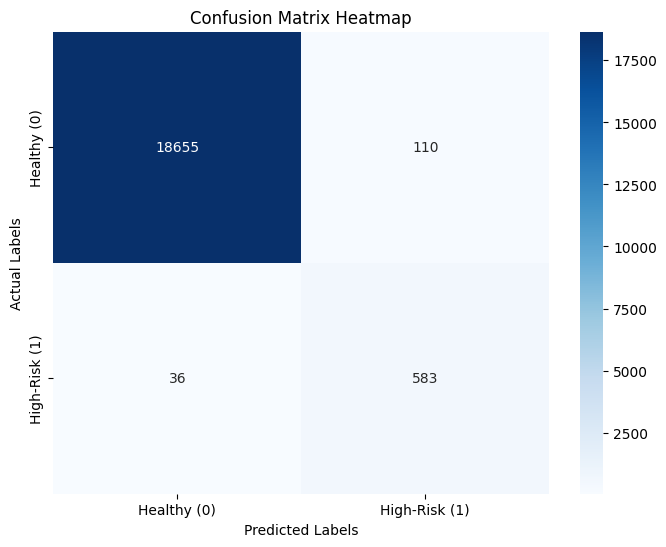

In [34]:
# Xpert Learning Assistant recommended creating 
# a visualization of the confusion matrix

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy (0)', 'High-Risk (1)'], 
            yticklabels=['Healthy (0)', 'High-Risk (1)'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')

# Save plot
plt.savefig("Images/heatmap.png")

# Show the plot
plt.show()

---